本数据集收集的是一个推特博主叫WeRateDog的每条推特。（超级有意思的博主）这个博主就是对狗狗打分 传送门->https://twitter.com/dog_rates

![Image Name](dogdog.jpg)

** 我在做的事情就是 **
- 1.数据进行收集
- 2.评估数据质量问题和清洁度（结构）问题，
- 3.清洗数据集
☺

## 收集

In [1]:
# 导入需要的库
import numpy as np
from aip import AipImageClassify
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

> 提示：你需要收集的文件有：
1. 收集手头文件 `twitter_archive_enhanced.csv`，其中包含了一些主要的推特信息，是本次清洗的主要数据，其中的评分、地位和名字等数据是从 `text` 原文中提取的，但是提取的并不好，评分并不都是正确的，狗的名字和地位也有不正确的 。**如果你想用评分、地位和名字进行分析和可视化，需要评估和清洗这些列。完成这些列的评估和清洗，你可以学到更加实用的技能。**
2. 编程下载收集互联网文件：`image-predictions.tsv`，其中包含了推特图像预测信息，根据推特中的图片预测出狗狗种类；
3. 查询 API 收集额外推特信息 `tweet_json.txt`，如果你无法访问 Twitter 的话，可以直接读取项目可供下载的 `tweet_json.txt` 文件，从中提取所需数据。至少需要提取转发数（`retweet_count`）和喜欢数（`favorite_count`）这两列，**如果你的分析中不需要用到其他列，则不需要收集其他列**。如果提取了其他列只用于清洗，那么这样的清洗没有意义。

In [2]:
# 收集文件 1 保存为 twitter_archive_enhanced
# 读取数据
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

# 显示前两行
twitter_archive_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
# 收集文件 2 保存为 tweet_json
# 显示数据前2行
tweet_json = pd.read_json("tweet_json.json", lines = True)

# 显示前两行
tweet_json.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [4]:
# 收集文件 3 保存为 image_predictions
# r = requests.get("https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv")

# # # 新建空的文件image-predictions_byPythonDownload.tsv
# fileobj = open("image-predictions_byPythonDownload.tsv", 'wb')

# # # 将数据写入fileobj中
# fileobj.write(r.content)
# fileobj.close()

image_predictions = pd.read_csv("image-predictions_byPythonDownload.tsv", sep = '\t')
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# 合并

## 评估
### 目测评估

In [6]:
# 目测评估三个数据集

twitter_archive_enhanced数据中有大量的空值 <br>
twitter_archive_enhanced数据中有些列是不需要用的比如 in_reply_to_status_id

tweet_json数据中包含了大量的空值

image_predictions数据中对狗狗品种认定，但是给出了三种结果，取其中最高的即可。

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

### 编程评估

In [7]:
# 使用 pandas 的各种方法评估三个数据集，比如 info value_counts 等

In [8]:
# 你需要添加更多的 code cell 和 markdown cell 来完成所有编程评估

In [9]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null int64
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [12]:
twitter_archive_enhanced['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [13]:
twitter_archive_enhanced['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [14]:
twitter_archive_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
twitter_archive_enhanced['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

> 提示：
- 完成目测评估和编程评估之后，总结列出你发现的三个数据集中的所有问题；
- 每个问题都要有对应的一句话或几句话描述；
- 最终至少要包含 8 个质量问题和 2 个整洁度问题。

#### 质量
##### `twitter_archive_enhanced` 表格
- 转发的(即retweets)的数据和回复的数据需要删除
- source  列应当只包含iphone web内容
- timestamp 列的时间数据不是datatime类型
- name列数据异常
- doggo	floofer	pupper	puppo 列数据缺失
- rating_denominator列中有异常值（等于0）
- 没有图片的数据需要删除
- tweet_id应当为object类型

##### `tweet_json` 表格


##### `image_predictions` 表格



#### 整洁度
- 合并`twitter_archive_enhanced`、`tweet_json`和`image_predictions`。以`twitter_archive_enhanced`为主要数据集合，保留`favorite_count `和`retweet_count `以及`jpg_url`、`img_num`、`p1`、`p1_conf`和`p1_dog`
- doggo floofer pupper puppo 可以合并成一个列


## 清理

> 提示：
- 清理数据集之前需要先备份数据集；
- 按照下面示例的结构：**定义-代码-测试**，对提出的每个问题进行清洗。

In [16]:
# 备份三个数据集
twitter_archive_enhanced.to_csv("twitter_archive_enhanced.csv")
tweet_json.to_csv("tweet_json.csv")
image_predictions.to_csv("image_predictions.csv")

In [17]:
twitter_data_clean = twitter_archive_enhanced.copy()
tweet_json_clean = tweet_json.copy()
image_predictions_clean = image_predictions.copy()

#### 问题描述一

##### 定义
in_reply_to_user_id 有78条，这些数据是回复。将其删除。 <br>
retweeted_status_user_id 是转发数据。将其删除

##### 代码

In [18]:
# 删除回复推特
df_temp = twitter_data_clean[twitter_data_clean["in_reply_to_user_id"].isnull()==False]
twitter_data_clean = twitter_data_clean.drop(index=df_temp.index)

In [19]:
# 删除转发推特
df_temp = twitter_data_clean[twitter_data_clean["retweeted_status_user_id"].isnull()==False]
twitter_data_clean = twitter_data_clean.drop(index=df_temp.index)

In [20]:
# 删除不用的列
col = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_data_clean = twitter_data_clean.drop(columns = col)

In [21]:
# 重置index列
twitter_data_clean.reset_index(drop=True, inplace=True)
# twitter_archive_enhanced

##### 测试

In [22]:
# 测试问题一是否正确清理完成
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 196.7+ KB


#### 问题描述二

##### 定义
source列应当只包含iphone web等内容 <br>
解析出每一个html标记语言中的内容
    `<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>`
提取出Twitter for iPhone

##### 代码

In [23]:
# 解决问题二的代码

In [24]:
'''
    解析出每一个html标记语言中的内容
    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
    提取出Twitter for iPhone
'''
# html = twitter_archive_enhanced['source'][1]
# t = BeautifulSoup(html, 'lxml')
# t.a.contents

for i in range(len(twitter_data_clean)):
    html = twitter_data_clean.loc[i, 'source']
    try:
        t = BeautifulSoup(html, 'lxml') # html转为BeautifulSoup
        twitter_data_clean.loc[i, 'source'] = t.a.contents[0]
    except:
        twitter_data_clean.loc[i, 'source'] = html
# twitter_archive_enhanced['source']

##### 测试

In [25]:
# 测试问题二是否正确清理完成
twitter_data_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### 问题描述三

##### 定义
timestamp 列的时间数据不是datatime类型

##### 代码

In [26]:
twitter_data_clean['timestamp'] = pd.to_datetime(twitter_data_clean['timestamp'])

##### 检测

In [27]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 196.7+ KB


#### 问题描述四

##### 定义
`name`列数据异常。根据`text`列修补 
- 使用正则表达式匹配名字，并且名字第一个字应该是大写.
- 如果`text`中没有写出名字那么用nan代替

##### 代码

In [28]:
# 引用 https://blog.csdn.net/u010606346/article/details/84778363
twitter_data_clean['name'] = twitter_data_clean['text'].str.extract(r'(?:This is|named|Meet|Say hello to|name is|Here we have|Here is)\s([A-Z][^\s.,]*)')

##### 测试

In [29]:
twitter_data_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Howard', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles',
       'Jack', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
       'Je

#### 问题描述五

##### 定义
`doggo floofer pupper puppo`等 列数据缺失
- 查询text中是否存在对应的单词（doggo floofer pupper puppo）
- 存在则放入对应的列

##### 代码

In [30]:
for i in range(len(twitter_data_clean)):
    if twitter_data_clean.loc[i, 'text'].find("puppo")!=-1:
        twitter_data_clean.loc[i, 'puppo'] = "puppo"
    else:
        twitter_data_clean.loc[i, 'puppo'] = ""
        
    if twitter_data_clean.loc[i, 'text'].find("doggo")!=-1:
        twitter_data_clean.loc[i, 'doggo'] = "doggo"
    else:
        twitter_data_clean.loc[i, 'doggo'] = ""
        
    if twitter_data_clean.loc[i, 'text'].find("floofer")!=-1:
        twitter_data_clean.loc[i, 'floofer'] = "floofer"
    else:
        twitter_data_clean.loc[i, 'floofer'] = ""
        
    if twitter_data_clean.loc[i, 'text'].find("pupper")!=-1:
        twitter_data_clean.loc[i, 'pupper'] = "pupper"     
    else:
        twitter_data_clean.loc[i, 'pupper'] = ""

##### 检测

In [31]:
twitter_data_clean[['doggo', 'puppo', 'pupper', 'floofer']]

,doggo,puppo,pupper,floofer
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,
5,,,,
6,,,,
7,,,,
8,,,,
9,doggo,,,


#### 问题描述六

##### 定义
rating_denominator列中有异常值（等于0）
<br>
使用正则表达式从新提取分数

##### 代码

In [32]:
temp = twitter_data_clean['text'].str.extract(r'(\d+\.?\d*\/\d+)')
temp = temp[0].str.split("/")

for i in range(len(twitter_data_clean)):
    twitter_data_clean.loc[i, 'new_rating_numerator'] = temp[i][0]
    twitter_data_clean.loc[i, 'new_rating_denominator'] = temp[i][1]

In [33]:
twitter_data_clean['new_rating_numerator'] = twitter_data_clean['new_rating_numerator'].astype("float64")
twitter_data_clean['new_rating_denominator'] = twitter_data_clean['new_rating_denominator'].astype("float64")

twitter_data_clean['rating_numerator'] = twitter_data_clean['rating_numerator'].astype("float64")
twitter_data_clean['rating_denominator'] = twitter_data_clean['rating_denominator'].astype("float64")

##### 检测

In [34]:
pd.set_option("max_colwidth", 200)

In [35]:
# 检测 rating_numerator 的变化
temp = twitter_data_clean['rating_numerator'] != twitter_data_clean['new_rating_numerator']
twitter_data_clean[temp][['rating_numerator', 'new_rating_numerator', 'text']]

,rating_numerator,new_rating_numerator,text
41,5.0,13.50,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948"
528,75.0,9.75,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
586,27.0,11.27,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1474,26.0,11.26,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [37]:
# 检测rating_denominator的变化
temp = twitter_data_clean['rating_denominator'] != twitter_data_clean['new_rating_denominator']
twitter_data_clean[temp][['rating_denominator', 'new_rating_denominator', 'text']]

,rating_denominator,new_rating_denominator,text


In [38]:
# 检测new_rating_denominator是否还有异常值。
twitter_data_clean['new_rating_denominator'].unique()

array([ 10.,  70.,   7., 150.,  11., 170.,  20.,  50.,  90.,  80.,  40.,
       110., 120.,   2.])

In [40]:
# 找出new_rating_denominator存在0的情况
twitter_data_clean[twitter_data_clean['new_rating_denominator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_rating_numerator,new_rating_denominator


In [41]:
# 手动修正
temp = twitter_data_clean[twitter_data_clean['new_rating_denominator'] == 0].index
twitter_data_clean.loc[temp, 'new_rating_denominator'] = 10
twitter_data_clean.loc[temp, 'new_rating_numerator'] = 13

In [42]:
# 再次检测
twitter_data_clean['new_rating_denominator'].unique()

array([ 10.,  70.,   7., 150.,  11., 170.,  20.,  50.,  90.,  80.,  40.,
       110., 120.,   2.])

#### 问题七

##### 定义
没有图片的数据需要删除

##### 代码

In [43]:
# 合并twitter_archive_enhanced 和 image_predictions数据集合
twitter_data_clean = pd.merge(twitter_data_clean, image_predictions_clean, how = "left", on = "tweet_id")
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 25 columns):
tweet_id                  2097 non-null int64
timestamp                 2097 non-null datetime64[ns]
source                    2097 non-null object
text                      2097 non-null object
expanded_urls             2094 non-null object
rating_numerator          2097 non-null float64
rating_denominator        2097 non-null float64
name                      1422 non-null object
doggo                     2097 non-null object
floofer                   2097 non-null object
pupper                    2097 non-null object
puppo                     2097 non-null object
new_rating_numerator      2097 non-null float64
new_rating_denominator    2097 non-null float64
jpg_url                   1971 non-null object
img_num                   1971 non-null float64
p1                        1971 non-null object
p1_conf                   1971 non-null float64
p1_dog                    1971 non

In [44]:
# 删除没有图片的数据行
tempdata = twitter_data_clean[pd.isnull(twitter_data_clean['img_num']) == True]
twitter_data_clean = twitter_data_clean.drop(index = tempdata.index)

In [45]:
# 删除不需要的列
col = ['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']  
twitter_data_clean = twitter_data_clean.drop(columns = col)

In [46]:
# 数据索引从新排列
twitter_data_clean.reset_index(drop=True, inplace=True)

##### 检测

In [47]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 19 columns):
tweet_id                  1971 non-null int64
timestamp                 1971 non-null datetime64[ns]
source                    1971 non-null object
text                      1971 non-null object
expanded_urls             1971 non-null object
rating_numerator          1971 non-null float64
rating_denominator        1971 non-null float64
name                      1380 non-null object
doggo                     1971 non-null object
floofer                   1971 non-null object
pupper                    1971 non-null object
puppo                     1971 non-null object
new_rating_numerator      1971 non-null float64
new_rating_denominator    1971 non-null float64
jpg_url                   1971 non-null object
img_num                   1971 non-null float64
p1                        1971 non-null object
p1_conf                   1971 non-null float64
p1_dog                    1971 non

#### 问题八

##### 定义
tweet_id应当为object类型


##### 代码

In [48]:
twitter_data_clean['tweet_id'] = twitter_data_clean['tweet_id'].astype("object")

##### 检测

In [49]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 19 columns):
tweet_id                  1971 non-null object
timestamp                 1971 non-null datetime64[ns]
source                    1971 non-null object
text                      1971 non-null object
expanded_urls             1971 non-null object
rating_numerator          1971 non-null float64
rating_denominator        1971 non-null float64
name                      1380 non-null object
doggo                     1971 non-null object
floofer                   1971 non-null object
pupper                    1971 non-null object
puppo                     1971 non-null object
new_rating_numerator      1971 non-null float64
new_rating_denominator    1971 non-null float64
jpg_url                   1971 non-null object
img_num                   1971 non-null float64
p1                        1971 non-null object
p1_conf                   1971 non-null float64
p1_dog                    1971 no

#### 问题描述九

##### 定义
合并twitter_archive_enhanced、tweet_json和image_predictions。以twitter_archive_enhanced为主要数据集合，保留favorite_count和retweet_count以及jpg_url、img_num、p1、p1_conf和p1_dog

<br>
合并jpg_url、img_num、p1、p1_conf和p1_dog的任务在**问题描述七**中完成了

##### 代码

In [50]:
'''
    补充twitter_archive_enhanced数据集中retweet_count列和favorite_count列
'''
rtweet_count_list = []
favorite_count_list = []
for i in range(len(twitter_data_clean)):
    id = twitter_data_clean.loc[i]['tweet_id']
    try:
        t1 = tweet_json[tweet_json['id'] == id]["retweet_count"]
        t2 = tweet_json[tweet_json['id'] == id]["favorite_count"]
        rtweet_count_list.append(t1.iloc[0])
        favorite_count_list.append(t2.iloc[0])
    except:
        rtweet_count_list.append(np.nan)
        favorite_count_list.append(np.nan)
# rtweet_count_list
# favorite_count_list

In [51]:
twitter_data_clean['favorite_count'] = favorite_count_list
twitter_data_clean['retweet_count'] = rtweet_count_list
twitter_data_clean[['favorite_count', 'retweet_count']].head(2)

,favorite_count,retweet_count
0,39492,8842
1,33786,6480


##### 检测

In [52]:
# 查询id=890729181411237888的推特数据是否相等
print(tweet_json[tweet_json['id'] == 890729181411237888]['favorite_count'])
print(twitter_data_clean[twitter_data_clean['tweet_id'] == 890729181411237888]['favorite_count'])

7    66596
Name: favorite_count, dtype: int64
7    66596
Name: favorite_count, dtype: int64


In [53]:
# 查询id=890729181411237888的推特数据是否相等
print(tweet_json[tweet_json['id'] == 890729181411237888]['retweet_count'])
print(twitter_data_clean[twitter_data_clean['tweet_id'] == 890729181411237888]['retweet_count'])

7    19548
Name: retweet_count, dtype: int64
7    19548
Name: retweet_count, dtype: int64


In [54]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 21 columns):
tweet_id                  1971 non-null object
timestamp                 1971 non-null datetime64[ns]
source                    1971 non-null object
text                      1971 non-null object
expanded_urls             1971 non-null object
rating_numerator          1971 non-null float64
rating_denominator        1971 non-null float64
name                      1380 non-null object
doggo                     1971 non-null object
floofer                   1971 non-null object
pupper                    1971 non-null object
puppo                     1971 non-null object
new_rating_numerator      1971 non-null float64
new_rating_denominator    1971 non-null float64
jpg_url                   1971 non-null object
img_num                   1971 non-null float64
p1                        1971 non-null object
p1_conf                   1971 non-null float64
p1_dog                    1971 no

##### 问题描述 十个

##### 定义
`doggo floofer pupper puppo` 可以合并成一个列 
 - 直接用字符串拼接方法将列合并成一个字符串，然后存放在`nickname`列中。

##### 代码

In [58]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 21 columns):
tweet_id                  1971 non-null object
timestamp                 1971 non-null datetime64[ns]
source                    1971 non-null object
text                      1971 non-null object
expanded_urls             1971 non-null object
rating_numerator          1971 non-null float64
rating_denominator        1971 non-null float64
name                      1380 non-null object
doggo                     1971 non-null object
floofer                   1971 non-null object
pupper                    1971 non-null object
puppo                     1971 non-null object
new_rating_numerator      1971 non-null float64
new_rating_denominator    1971 non-null float64
jpg_url                   1971 non-null object
img_num                   1971 non-null float64
p1                        1971 non-null object
p1_conf                   1971 non-null float64
p1_dog                    1971 no

In [59]:
for i in range(len(twitter_data_clean)):
    twitter_data_clean.loc[i, 'nickname'] = twitter_data_clean.loc[i, 'doggo'] + ',' +  twitter_data_clean.loc[i, 'floofer']\
    + twitter_data_clean.loc[i, 'pupper'] + twitter_data_clean.loc[i, 'puppo']

In [61]:
# 删除不需要的列
col = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_data_clean = twitter_data_clean.drop(columns= col)

##### 检测

In [62]:
twitter_data_clean['nickname']

0             ,
1             ,
2             ,
3             ,
4             ,
5             ,
6             ,
7             ,
8             ,
9        doggo,
10            ,
11            ,
12       ,puppo
13            ,
14       ,puppo
15            ,
16            ,
17            ,
18            ,
19            ,
20            ,
21            ,
22            ,
23            ,
24            ,
25            ,
26            ,
27            ,
28      ,pupper
29            ,
         ...   
1941          ,
1942          ,
1943          ,
1944          ,
1945          ,
1946          ,
1947          ,
1948          ,
1949          ,
1950          ,
1951          ,
1952          ,
1953          ,
1954          ,
1955          ,
1956          ,
1957          ,
1958          ,
1959          ,
1960          ,
1961          ,
1962          ,
1963          ,
1964          ,
1965          ,
1966          ,
1967          ,
1968          ,
1969          ,
1970          ,
Name: nickname, Length: 

In [63]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 18 columns):
tweet_id                  1971 non-null object
timestamp                 1971 non-null datetime64[ns]
source                    1971 non-null object
text                      1971 non-null object
expanded_urls             1971 non-null object
rating_numerator          1971 non-null float64
rating_denominator        1971 non-null float64
name                      1380 non-null object
new_rating_numerator      1971 non-null float64
new_rating_denominator    1971 non-null float64
jpg_url                   1971 non-null object
img_num                   1971 non-null float64
p1                        1971 non-null object
p1_conf                   1971 non-null float64
p1_dog                    1971 non-null object
favorite_count            1971 non-null int64
retweet_count             1971 non-null int64
nickname                  1971 non-null object
dtypes: datetime64[ns](1), float64(

### 存储清理后的主数据集

In [64]:
twitter_data_clean.to_csv("twitter_data_clean.csv")

## 分析和可视化

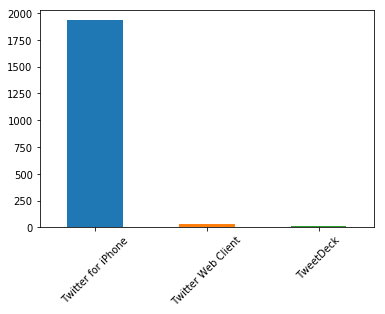

In [65]:
# 分析或可视化代码
%matplotlib inline
twitter_data = pd.read_csv("twitter_data_clean.csv")
twitter_data['source'].value_counts().plot.bar(rot = 45)

博主平时使用的是手机发送推特。

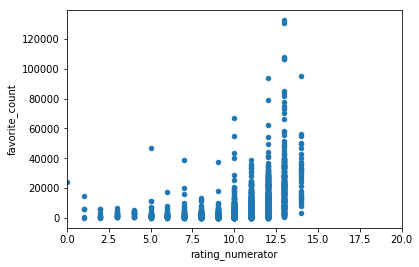

In [66]:
# 分析或可视化代码
twitter_data.plot.scatter(x="rating_numerator", y="favorite_count", xlim=(0,20))

分数和点赞数的关系图 <br>
从图中可以看出有时候在高分的时候，会获得搞点赞。

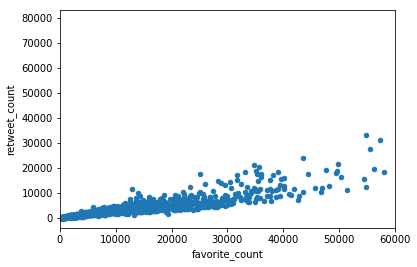

In [67]:
twitter_data[['favorite_count', "retweet_count"]].plot.scatter(x="favorite_count", y = "retweet_count", xlim=(0, 60000))

转发数和点赞数的关系图 <br>
点赞数和转发数成正相关性。

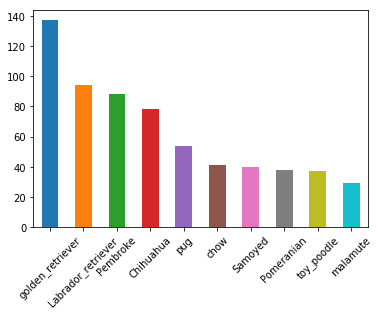

In [68]:
t = twitter_data['p1'].value_counts()[0:10]
t.plot.bar(rot=45)

狗狗品种出现的次数统计图 <br>
可以看出作者转发更多的是“金毛犬”和“拉布拉多”
ps:我也喜欢大金毛

更多说明或总结等

> 提示：在完成 Notebook 的所有内容之后，还需要完成两篇文本和图片组成的 PDF 报告。因为这两篇报告中只是文字和图片，不需要包含代码，你可以使用文字编辑软件，比如 Word 来完成：
- 创建一个 300-600 字的书面报告，命名为 `wrangle_report.pdf`，在该报告中简要描述你的数据整理过程。这份报告可以看作是一份内部文档，供你的团队成员查看交流。
- 创建一个 250 字以上的书面报告，命名为 `act_report.pdf`，在该报告中，你可以与读者交流观点，展示你使用整理过的数据生成的可视化图表。这份报告可以看作是一份外部文档，如博客帖子或杂志文章。

> 提示：提交项目前建议删除 Notebook 中的所有提示性文字和注释，只保留自己的 Markdown 文本和代码注释。